<h2 style='color:purple' align='center'>Build our first neural network in Keras for image classification problem</h2>

In [60]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

TensorFlow (import tf from tensorflow):
Google created the open-source machine learning library TensorFlow. For the purpose of creating and implementing machine learning models, especially neural networks, it offers an adaptable and effective framework.
Importing Keras as Keras:
Operating on top of TensorFlow (or other backends) is the high-level neural networks API known as Keras. It provides a modular and user-friendly interface for creating, honing, and implementing deep learning models. In your instance, TensorFlow is most likely the backend and Keras is being used.
Importing numpy as np into NumPy
A core Python library for scientific computing is called NumPy. Large, multi-dimensional arrays and matrices are supported, and a number of mathematical operations may be performed on these arrays.
Importing matplotlib.pyplot as plt from Matplotlib:
Python has a charting package called Matplotlib. It is helpful for displaying and evaluating data since it allows for the production of many kinds of charts and visualizations.
Inline %matplotlib:
This is a magic command for the Jupyter Notebook. It guarantees that Matplotlib plots are shown within the notebook, which facilitates interactive data visualization and exploration.
Importing these libraries gives you a strong workspace for working on machine learning tasks, such as using TensorFlow and Keras for data processing and model development and Visualization



In [5]:
keras.backend.backend()

'tensorflow'

This below cell is for dataset which we are extracting from the keras (keras.datasets.fashion_mnist) as fm it has 70000 images and we will divide the images into the test and train as 60000 and 10000 is the split we did for this data set

In [6]:
fm = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fm.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [38]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [39]:
y_train[1]

0

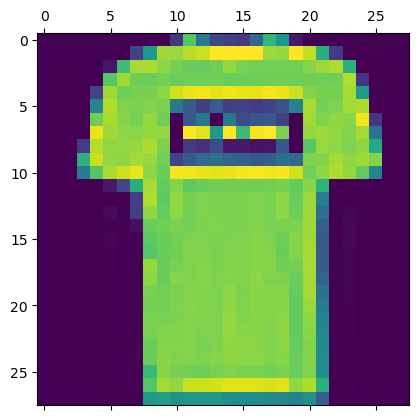

In [40]:
plt.matshow(X_train[1])

<h3 style='color:purple'>Normalize training data before training the neural net</h3>

In [12]:
X_train = X_train/255

In [13]:
X_test = X_test/255

<h3 style='color:purple'>Now build the Sequential Model and add layers into it</h3>

In [14]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

Layer Flattening:
Shape of Input: [28, 28]
Function: Converts the input data into a flat 1D array with a size of 784 from a 28x28 matrix that represents an image. Prior to sending the data to the fully linked levels, this is required.
Layer Dense 1:
There are 100 neurons.
Rectified Linear Unit, or ReLU, is the activation function.
Function: Gives the model non-linearity. After applying a weighted total and receiving input from all 784 neurons in the flattened input layer, each neuron in this layer then runs the information through the ReLU activation function.
Layer 2 Dense (Output Layer):
Ten neurons (since there are ten classifications for fashion products)
Softmax as the Activation Function
Generates a probability distribution across the ten classes is the function. The output values are guaranteed to be normalized and to reflect probabilities by the Softmax activation function. For the input picture, the class with the highest probability is anticipated to be the final class.
To summarize, your neural network consists of a single hidden layer and is a basic feedforward network. The 2D input data is converted into a 1D array by the Flatten layer, while the classification duty is handled by the Dense layers, which also add non-linearity.



Please don't hesitate to ask any specific inquiries or to learn more about something in particular!



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [17]:
model.fit(X_train, y_train)



1875/1875 [==============================] - 6s 3ms/step - loss: 0.4996 - accuracy: 0.8244


In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4386 - accuracy: 0.8454


[0.4386363625526428, 0.8453999757766724]

**Above shows accuracy score of 82.76%. The first parameter is loss**

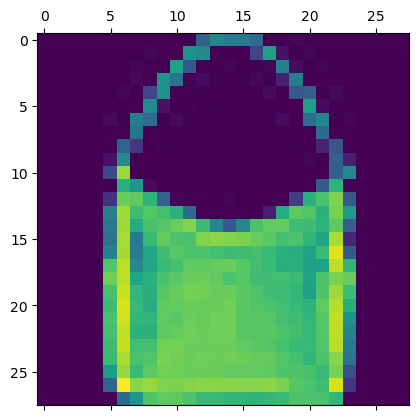

In [51]:
plt.matshow(X_test[34])

In [54]:
yp = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [55]:
np.argmax(yp[34])

8

In [56]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [57]:
class_labels[np.argmax(yp[34])]

'Bag'